In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_footsteps_accelerations_absolute
%store -r Y_footsteps_accelerations_absolute
%store -r X_footsteps_continuous_absolute
%store -r Y_footsteps_continuous_absolute
X_motion = np.concatenate((X_footsteps_accelerations_absolute, X_footsteps_continuous_absolute))
Y_motion = np.concatenate((Y_footsteps_accelerations_absolute, Y_footsteps_continuous_absolute))
print(X_motion.shape)
print(Y_motion.shape)

(1558, 20)
(1558, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL/RR are swinging
idxs = np.where(X_motion[:, -2] == 1)[0]
X_motion_RR_swinging = X_motion[idxs]
Y_motion_RR_swinging = Y_motion[idxs]

## Predict RR foot -> x

In [8]:
X_motion_RR_swinging[0, :]

array([ 0.        ,  0.        ,  0.        ,  0.24316426,  0.12834719,
       -0.38366681,  0.23878607, -0.13193817, -0.36480507, -0.25856626,
        0.12253836, -0.36866394, -0.25985879, -0.12464122, -0.38309926,
        0.1       ,  0.        ,  0.        ,  1.        ,  0.        ])

In [9]:
Y_motion_RR_swinging[0, :]

array([-0.00169894, -0.00981897, -0.00087816, -0.01051381])

### Linear Regression

In [10]:
# Input
X = np.hstack((X_motion_RR_swinging[:, :3], # Previous motion command
               X_motion_RR_swinging[:, -5:-2], # Current motion command
               X_motion_RR_swinging[:, 3:5], # FL (x,y) position
               X_motion_RR_swinging[:, 6:8], # FR (x,y) position
               X_motion_RR_swinging[:, 9:11], # RL (x,y) position
               X_motion_RR_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_RR_swinging[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rr_relative_swinging_x = LinearRegression()

# Fit the model
model_rr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9881231207265909
RMSE:  0.014445859801125154
The lowest error is:  5.301197535390045e-07
The highest error is:  0.07911903248383167
The avg. error is:  0.009949269342413095


In [11]:
model_rr_relative_swinging_x.coef_

array([[ 1.83698516e-01, -2.22044605e-16, -2.22044605e-16,
         3.79752850e-02,  3.88578059e-16, -2.22044605e-16,
        -2.54650467e-01, -2.67676201e-01,  8.74520944e-01,
         1.52492312e+00, -3.56168632e-01, -5.02983854e-01,
        -2.00363021e+00, -1.28881520e+00]])

In [12]:
model_rr_relative_swinging_x.intercept_

array([-0.63309639])

Text(0, 0.5, 'Predictions')

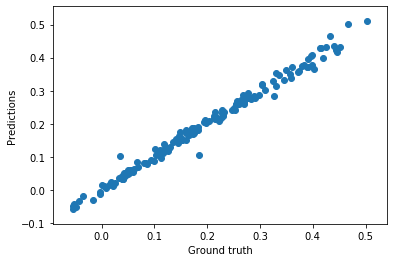

In [13]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [14]:
#%store model_rr_relative_swinging_x

In [15]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [16]:
# Save model
#joblib.dump(model_rr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_x.sav")

### Predict RR foot -> y

In [17]:
# Input
X = np.hstack((X_motion_RR_swinging[:, :3], # Previous motion command
               X_motion_RR_swinging[:, -5:-2], # Current motion command
               X_motion_RR_swinging[:, 3:5], # FL (x,y) position
               X_motion_RR_swinging[:, 6:8], # FR (x,y) position
               X_motion_RR_swinging[:, 9:11], # RL (x,y) position
               X_motion_RR_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_RR_swinging[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rr_relative_swinging_y = LinearRegression()

# Fit the model
model_rr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.42099915943048616
RMSE:  0.006935235269993529
The lowest error is:  2.7341050420383317e-07
The highest error is:  0.030312609355843602
The avg. error is:  0.005197712159640086


In [18]:
model_rr_relative_swinging_y.coef_

array([[ 9.38344530e-03, -1.90819582e-17, -1.49619900e-16,
        -1.68264806e-02,  1.94289029e-16,  1.66533454e-16,
        -1.03242169e-01, -1.11605608e+00,  4.01249198e-02,
         4.92259622e-01, -1.00137509e-01,  5.58672194e-01,
         7.44317352e-03, -1.11908575e+00]])

In [19]:
model_rr_relative_swinging_y.intercept_

array([-0.01373425])

Text(0, 0.5, 'Predictions')

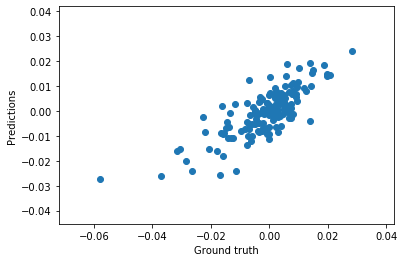

In [20]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [21]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')